In [1]:
#Allow output from every line and import necessary packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import PIL
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#Read NCAA college basketball efficiency and tempo data from KenPom
KenPom = pd.read_csv("data/KenPomTournamentTeams_2024.csv")
KenPom = KenPom.rename(columns = {"Rk":"AdjEM Rank"})
KenPom = KenPom.iloc[:,[1,2,3,4,5,6,0,7,8,9,10,11,12,13,14]]
KenPom
#AdjEM = Adjusted Efficiency margin
#AdjO = Adjusted Offensive Efficiency (points scored per 100 possessions, weighted by opponent)
#AdjD = Adjusted Defensive Efficiency (points allowed per 100 possessions, weighted by opponent)

,Team,Region,Seed,Conf,W-L,AdjEM,AdjEM Rank,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjT Rank,Luck,Luck Rank
0,Connecticut,East,1,BE,31-3,32.21,1,126.6,1,94.4,11,64.5,329,0.047,70
1,Houston,South,1,B12,30-4,31.72,2,118.9,17,87.1,2,63.3,348,0.053,61
2,Purdue,Midwest,1,B10,29-4,29.12,3,125.0,4,95.9,21,67.4,175,0.045,75
3,Auburn,East,4,SEC,27-7,28.90,4,120.6,10,91.7,4,69.8,58,-0.067,324
4,Iowa St.,East,2,B12,27-7,26.72,5,113.9,55,87.1,1,67.3,179,0.012,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Montana St.,Midwest,16,BSky,17-17,-3.90,213,103.3,234,107.2,198,68.8,96,0.000,184
64,Stetson,East,16,ASun,22-12,-4.10,218,110.3,100,114.4,342,66.2,257,0.137,6
65,Grambling St.,Midwest,16,SWAC,20-14,-7.81,267,99.3,297,107.1,197,64.8,314,0.131,8
66,Howard,West,16,MEAC,18-16,-8.26,276,105.5,192,113.8,334,67.5,163,0.023,119


In [3]:
#Copy urls from sportslogos.net into an iterable list
urls = ['https://www.sportslogos.net/teams/list_by_league/30/NCAA_Division_I_a-c/NCAA_a-c/logos/',
        'https://www.sportslogos.net/teams/list_by_league/31/NCAA_Division_I_d-h/NCAA_d-h/logos/',
        'https://www.sportslogos.net/teams/list_by_league/32/NCAA_Division_I_i-m/NCAA_i-m/logos/',
        'https://www.sportslogos.net/teams/list_by_league/33/NCAA_Division_I_n-r/NCAA_n-r/logos/',
        'https://www.sportslogos.net/teams/list_by_league/34/NCAA_Division_I_s-t/NCAA_s-t/logos/',
        'https://www.sportslogos.net/teams/list_by_league/35/NCAA_Division_I_u-z/NCAA_u-z/logos/']
urls

['https://www.sportslogos.net/teams/list_by_league/30/NCAA_Division_I_a-c/NCAA_a-c/logos/',
 'https://www.sportslogos.net/teams/list_by_league/31/NCAA_Division_I_d-h/NCAA_d-h/logos/',
 'https://www.sportslogos.net/teams/list_by_league/32/NCAA_Division_I_i-m/NCAA_i-m/logos/',
 'https://www.sportslogos.net/teams/list_by_league/33/NCAA_Division_I_n-r/NCAA_n-r/logos/',
 'https://www.sportslogos.net/teams/list_by_league/34/NCAA_Division_I_s-t/NCAA_s-t/logos/',
 'https://www.sportslogos.net/teams/list_by_league/35/NCAA_Division_I_u-z/NCAA_u-z/logos/']

In [4]:
import requests 
from bs4 import BeautifulSoup

#Initialize empty lists for team logo image addresses and team names
team_logos = []
team_names = []

#Define function to return html data to be used for Beautiful Soup html parser
def getdata(url): 
    r = requests.get(url) 
    return r.text

#Iterate through urls and image items in html data and append to corresponding empty list
for url in urls:
    htmldata = getdata(url) 
    soup = BeautifulSoup(htmldata, 'html.parser')
    
    for item in soup.find_all('img'):
        team_logos.append(item['src'])
        team_names.append(item.next_element)

In [5]:
#List comprehension for only gif types (we want only the team logos and not other images on webpage)
team_logos = [x for x in team_logos if 'gif' in x]
len(team_logos) #check length to compare for final parsed team names (in order to create dictionary)

#Begin parsing team names list to remove html nonsense
#Initialize empty list to work with
team_names_split = []

#Split by \t and create list of lists
for i in range(len(team_names)):
    team_names_split.append(team_names[i].split("\t"))

#Initialize final list and remove everything other than team name strings
team_names_final = []

for i in range(len(team_names_split)):
    for j in range(len(team_names_split[i])):
        if len(team_names_split[i][j]) > 6:
            team_names_final.append(team_names_split[i][j])

len(team_names_final) #check length of team names equals length of team logos

#Create team logos DataFrame to merge to KenPom DataFrame
NCAA_team_logos = pd.DataFrame()
NCAA_team_logos["Team Mascot"] = team_names_final
NCAA_team_logos["Path"] = team_logos 

team_merge = ["Akron Zips",
              "Alabama Crimson Tide", 
              "Arizona Wildcats",
              "Auburn Tigers",
              "Brigham Young Cougars",
              "Baylor Bears",
              "Boise State Broncos",
              "College of Charleston Cougars",
              "Clemson Tigers",
              "Colgate Raiders",
              "Colorado State Rams",
              "Colorado Buffaloes",
              "UConn Huskies",
              "Creighton Bluejays",
              "Dayton Flyers",
              "Drake Bulldogs",
              "Duke Blue Devils",
              "Duquesne Dukes",
              "Florida Gators",
              "Florida Atlantic Owls",
              "Gonzaga Bulldogs",
              "Grambling State Tigers",
              "Grand Canyon Antelopes",
              "Houston Cougars",
              "Howard Bison",
              "Illinois Fighting Illini",
              "Iowa State Cyclones",
              "James Madison Dukes",
              "Kansas Jayhawks",
              "Kentucky Wildcats",
              "Long Beach State 49ers",
              "Longwood Lancers",
              "Marquette Golden Eagles",
              "McNeese State Cowboys",
              "Michigan State Spartans",
              "Mississippi State Bulldogs",
              "Montana State Bobcats",
              "Morehead State Eagles",
              "North Carolina State Wolfpack",
              "Nebraska Cornhuskers",
              "Nevada Wolf Pack",
              "New Mexico Lobos",
              "North Carolina Tar Heels",
              "Northwestern Wildcats",
              "Oakland Golden Grizzlies",
              "Oregon Ducks",
              "Purdue Boilermakers",
              "Saint Marys Gaels",
              "Saint Peters Peacocks",
              "Samford Bulldogs",
              "San Diego State Aztecs",            
              "South Carolina Gamecocks",              
              "South Dakota State Jackrabbits",
              "Stetson Hatters",
              "TCU Horned Frogs",              
              "Tennessee Volunteers",              
              "Texas Longhorns",              
              "Texas A&M Aggies",              
              "Texas Tech Red Raiders",             
              "UAB Blazers",
              "Utah State Aggies",
              "Vermont Catamounts",              
              "Virginia Cavaliers",              
              "Wagner Seahawks",              
              "Washington State Cougars",
              "Western Kentucky Hilltoppers",
              "Wisconsin Badgers",              
              "Yale Bulldogs"]

KenPom = KenPom.sort_values("Team")
KenPom["Team Mascot"] = team_merge
KenPom = KenPom.sort_index()
KenPom

406

406

,Team,Region,Seed,Conf,W-L,AdjEM,AdjEM Rank,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjT Rank,Luck,Luck Rank,Team Mascot
0,Connecticut,East,1,BE,31-3,32.21,1,126.6,1,94.4,11,64.5,329,0.047,70,UConn Huskies
1,Houston,South,1,B12,30-4,31.72,2,118.9,17,87.1,2,63.3,348,0.053,61,Houston Cougars
2,Purdue,Midwest,1,B10,29-4,29.12,3,125.0,4,95.9,21,67.4,175,0.045,75,Purdue Boilermakers
3,Auburn,East,4,SEC,27-7,28.90,4,120.6,10,91.7,4,69.8,58,-0.067,324,Auburn Tigers
4,Iowa St.,East,2,B12,27-7,26.72,5,113.9,55,87.1,1,67.3,179,0.012,155,Iowa State Cyclones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Montana St.,Midwest,16,BSky,17-17,-3.90,213,103.3,234,107.2,198,68.8,96,0.000,184,Montana State Bobcats
64,Stetson,East,16,ASun,22-12,-4.10,218,110.3,100,114.4,342,66.2,257,0.137,6,Stetson Hatters
65,Grambling St.,Midwest,16,SWAC,20-14,-7.81,267,99.3,297,107.1,197,64.8,314,0.131,8,Grambling State Tigers
66,Howard,West,16,MEAC,18-16,-8.26,276,105.5,192,113.8,334,67.5,163,0.023,119,Howard Bison


In [6]:
#Left join logos DataFrame to KenPom data
KenPom = pd.merge(KenPom, NCAA_team_logos, how="left", on="Team Mascot")
KenPom

,Team,Region,Seed,Conf,W-L,AdjEM,AdjEM Rank,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjT Rank,Luck,Luck Rank,Team Mascot,Path
0,Connecticut,East,1,BE,31-3,32.21,1,126.6,1,94.4,11,64.5,329,0.047,70,UConn Huskies,https://content.sportslogos.net/logos/35/884/t...
1,Houston,South,1,B12,30-4,31.72,2,118.9,17,87.1,2,63.3,348,0.053,61,Houston Cougars,https://content.sportslogos.net/logos/31/700/t...
2,Purdue,Midwest,1,B10,29-4,29.12,3,125.0,4,95.9,21,67.4,175,0.045,75,Purdue Boilermakers,https://content.sportslogos.net/logos/33/809/t...
3,Auburn,East,4,SEC,27-7,28.90,4,120.6,10,91.7,4,69.8,58,-0.067,324,Auburn Tigers,https://content.sportslogos.net/logos/30/610/t...
4,Iowa St.,East,2,B12,27-7,26.72,5,113.9,55,87.1,1,67.3,179,0.012,155,Iowa State Cyclones,https://content.sportslogos.net/logos/32/713/t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Montana St.,Midwest,16,BSky,17-17,-3.90,213,103.3,234,107.2,198,68.8,96,0.000,184,Montana State Bobcats,https://content.sportslogos.net/logos/32/760/t...
64,Stetson,East,16,ASun,22-12,-4.10,218,110.3,100,114.4,342,66.2,257,0.137,6,Stetson Hatters,https://content.sportslogos.net/logos/34/857/t...
65,Grambling St.,Midwest,16,SWAC,20-14,-7.81,267,99.3,297,107.1,197,64.8,314,0.131,8,Grambling State Tigers,https://content.sportslogos.net/logos/31/692/t...
66,Howard,West,16,MEAC,18-16,-8.26,276,105.5,192,113.8,334,67.5,163,0.023,119,Howard Bison,https://content.sportslogos.net/logos/31/701/t...


In [7]:
#Create new column from reading gif address and save image as jpg file in working directory
import urllib
pd.options.mode.chained_assignment = None

KenPom["New Path"] = "None"*len(KenPom)

#EDIT CODE CHUNK HERE: Replace my local directory to your working directory where the notebook is saved

for i in range(len(KenPom)):
    KenPom["New Path"][i] = r"C:\Users\owenb\OneDrive\Python Sport Analytics\Module 8 Final Project\Logo_" + KenPom["Team"][i] + ".JPG"
    urllib.request.urlretrieve(KenPom["Path"][i], KenPom["New Path"][i])
    
KenPom["New Path"][0]
KenPom["New Path"][67]

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Connecticut.JPG',
 <http.client.HTTPMessage at 0x26105654a90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Houston.JPG',
 <http.client.HTTPMessage at 0x26105657890>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Purdue.JPG',
 <http.client.HTTPMessage at 0x26105654310>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Auburn.JPG',
 <http.client.HTTPMessage at 0x26105660fd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Iowa St..JPG',
 <http.client.HTTPMessage at 0x26105660a50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Arizona.JPG',
 <http.client.HTTPMessage at 0x26105661550>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Tennessee.JPG',
 <http.client.HTTPMessage at 0x26105661510>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Duke.JPG',
 <http.client.HTTPMessage at 0x26105661490>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_North Carolina.JPG',
 <http.client.HTTPMessage at 0x26105660b50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Illinois.JPG',
 <http.client.HTTPMessage at 0x261056603d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Creighton.JPG',
 <http.client.HTTPMessage at 0x26105660490>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Marquette.JPG',
 <http.client.HTTPMessage at 0x26105661050>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Alabama.JPG',
 <http.client.HTTPMessage at 0x261056625d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Baylor.JPG',
 <http.client.HTTPMessage at 0x26105662390>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Gonzaga.JPG',
 <http.client.HTTPMessage at 0x26105662c10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_BYU.JPG',
 <http.client.HTTPMessage at 0x261056628d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wisconsin.JPG',
 <http.client.HTTPMessage at 0x261056625d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Michigan St..JPG',
 <http.client.HTTPMessage at 0x26105662950>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Kentucky.JPG',
 <http.client.HTTPMessage at 0x26105663850>)

("C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Saint Mary's.JPG",
 <http.client.HTTPMessage at 0x26105658050>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_San Diego St..JPG',
 <http.client.HTTPMessage at 0x261056625d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Kansas.JPG',
 <http.client.HTTPMessage at 0x26105658850>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_New Mexico\xa0.JPG',
 <http.client.HTTPMessage at 0x26105658690>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas Tech.JPG',
 <http.client.HTTPMessage at 0x26105658d90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colorado\xa0.JPG',
 <http.client.HTTPMessage at 0x26105658c10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas.JPG',
 <http.client.HTTPMessage at 0x26105659150>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Nebraska.JPG',
 <http.client.HTTPMessage at 0x26105659410>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Florida.JPG',
 <http.client.HTTPMessage at 0x26105659810>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Mississippi St..JPG',
 <http.client.HTTPMessage at 0x261056589d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Dayton.JPG',
 <http.client.HTTPMessage at 0x26105659c50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_TCU.JPG',
 <http.client.HTTPMessage at 0x26105658bd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Clemson.JPG',
 <http.client.HTTPMessage at 0x26105659110>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Nevada\xa0.JPG',
 <http.client.HTTPMessage at 0x26105658ad0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colorado St.\xa0.JPG',
 <http.client.HTTPMessage at 0x26105659ad0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Boise St.\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565a750>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Florida Atlantic.JPG',
 <http.client.HTTPMessage at 0x26105658b50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Washington St..JPG',
 <http.client.HTTPMessage at 0x26105658710>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas A&M.JPG',
 <http.client.HTTPMessage at 0x2610565a310>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Northwestern.JPG',
 <http.client.HTTPMessage at 0x2610565a2d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Utah St..JPG',
 <http.client.HTTPMessage at 0x2610565b210>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_South Carolina.JPG',
 <http.client.HTTPMessage at 0x2610565b410>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Drake\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565b4d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Grand Canyon\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565b8d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Oregon\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565bc10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_N.C. State\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565be50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_James Madison\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565a0d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_McNeese St.\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565b4d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Virginia\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565bed0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Samford\xa0.JPG',
 <http.client.HTTPMessage at 0x2610565a950>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Yale\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678150>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Duquesne\xa0.JPG',
 <http.client.HTTPMessage at 0x261056784d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Charleston\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678e50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Vermont\xa0.JPG',
 <http.client.HTTPMessage at 0x26105679050>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_UAB\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678850>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Morehead St.\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678150>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Akron\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678c90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Western Kentucky\xa0.JPG',
 <http.client.HTTPMessage at 0x26105679790>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_South Dakota St.\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678710>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Oakland\xa0.JPG',
 <http.client.HTTPMessage at 0x261056790d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colgate\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678ed0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Longwood\xa0.JPG',
 <http.client.HTTPMessage at 0x26105679590>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Long Beach St.\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678050>)

("C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Saint Peter's\xa0.JPG",
 <http.client.HTTPMessage at 0x26105678210>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Montana St.\xa0.JPG',
 <http.client.HTTPMessage at 0x26105679cd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Stetson\xa0.JPG',
 <http.client.HTTPMessage at 0x26105679c50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Grambling St.\xa0.JPG',
 <http.client.HTTPMessage at 0x26105679b50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Howard\xa0.JPG',
 <http.client.HTTPMessage at 0x26105679550>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wagner\xa0.JPG',
 <http.client.HTTPMessage at 0x26105678110>)

'C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Connecticut.JPG'

'C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wagner\xa0.JPG'

<IPython.core.display.Javascript object>


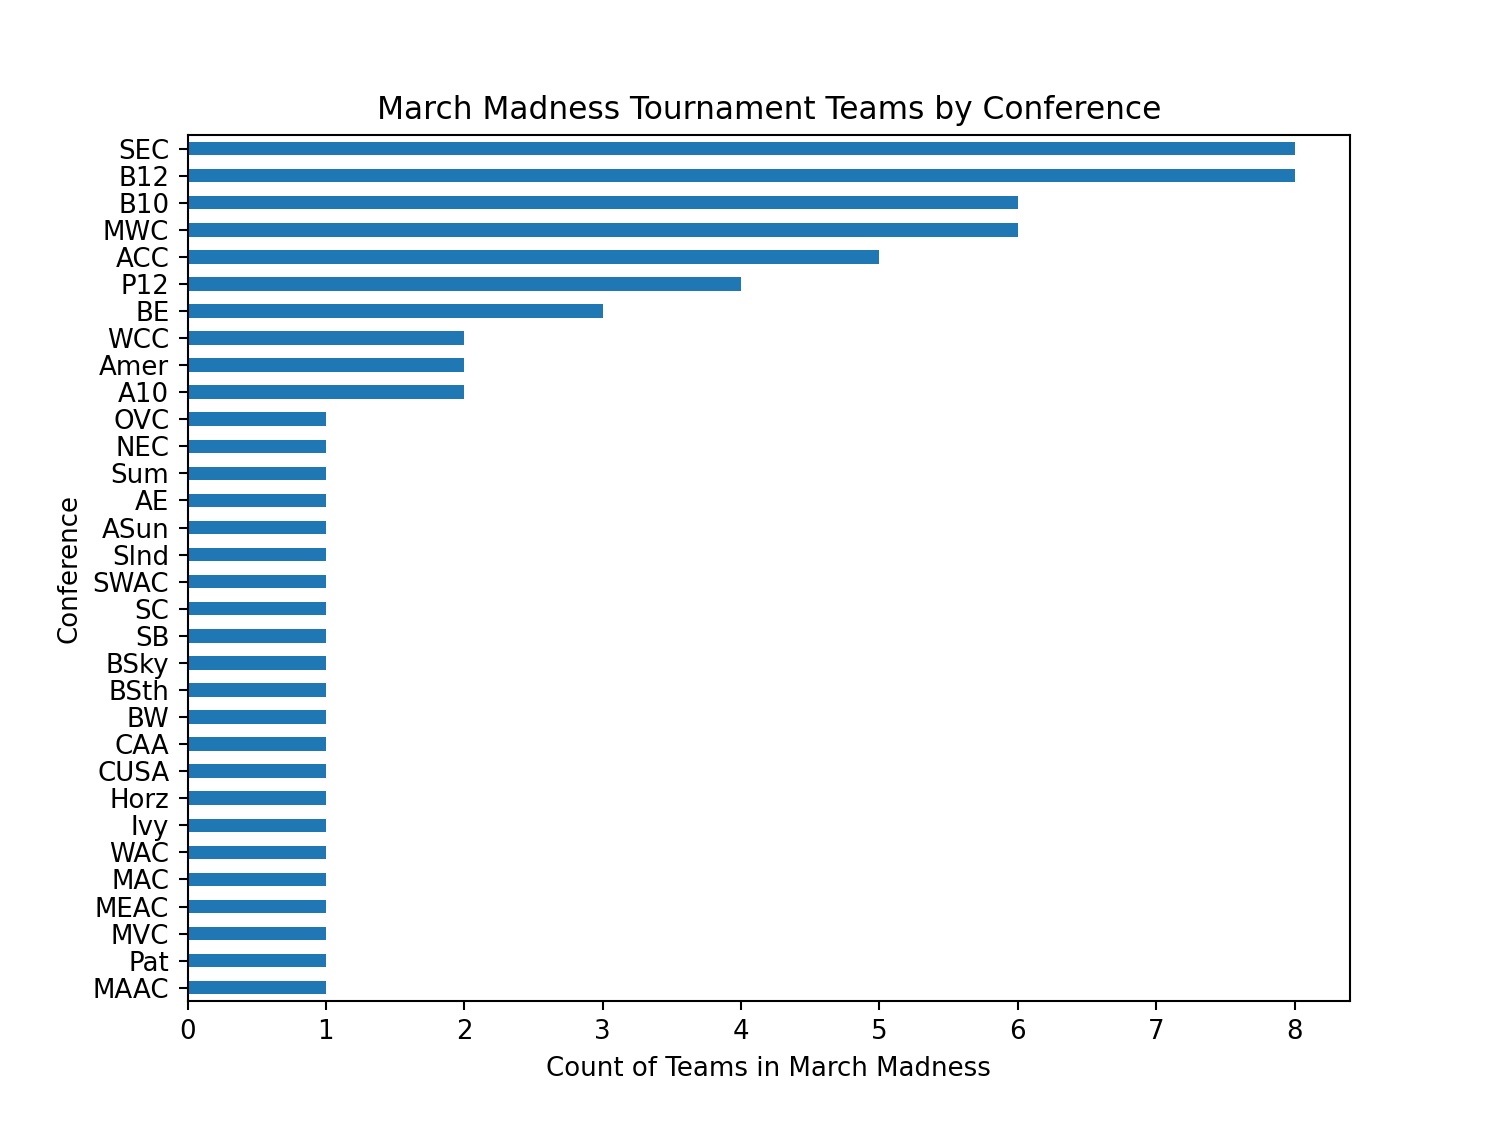

<Axes: title={'center': 'March Madness Tournament Teams by Conference'}, xlabel='Count of Teams in March Madness', ylabel='Conference'>

In [8]:
#Top 80 KenPom teams conference distribution
fig, ax = plt.subplots(figsize=(8,6))

KenPom.groupby("Conf").count().Team.sort_values().plot.barh(ax=ax,
                                                            ylabel="Conference", 
                                                            xlabel="Count of Teams in March Madness", 
                                                            title = "March Madness Tournament Teams by Conference")

<IPython.core.display.Javascript object>


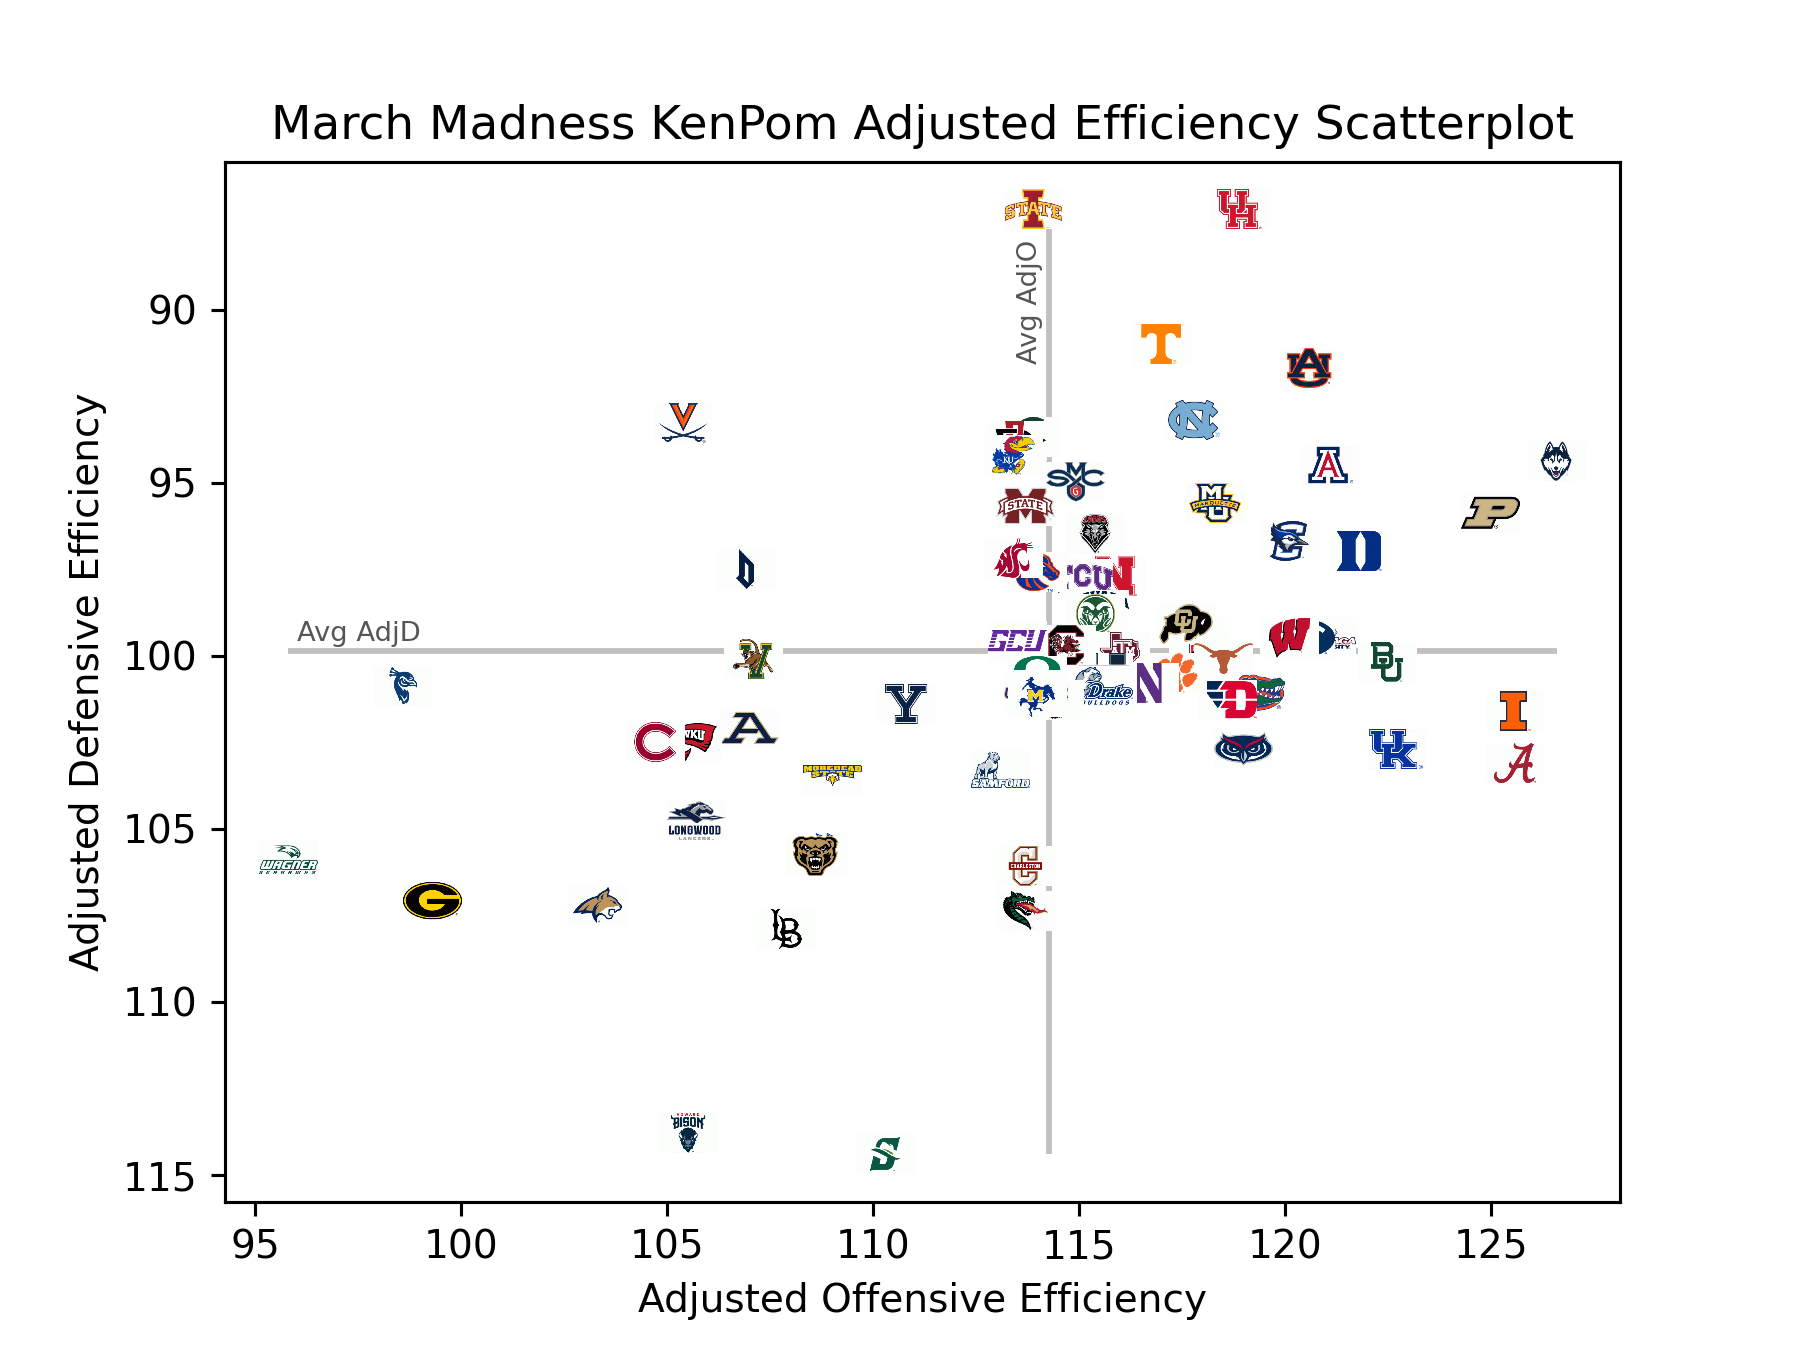

<Axes: title={'center': 'March Madness KenPom Adjusted Efficiency Scatterplot'}, xlabel='Adjusted Offensive Efficiency', ylabel='Adjusted Defensive Efficiency'>

Text(0.565, 0.735, 'Avg AdjO')

Text(0.165, 0.525, 'Avg AdjD')

In [9]:
#Original Efficiency Scatterplot with Team Logos
fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution

KenPom.plot.scatter(x="AdjO", 
                    y="AdjD", 
                    ylabel="Adjusted Defensive Efficiency", 
                    xlabel="Adjusted Offensive Efficiency", 
                    title="March Madness KenPom Adjusted Efficiency Scatterplot",
                    ax=ax)

ax.invert_yaxis() #we want better defensive efficiency to be higher on the chart (fewer points allowed)

# Add average lines
plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

# Average line labels
fig.text(.565,.735,'Avg AdjO', size=7, color='#575654',rotation=90)
fig.text(.165,.525,'Avg AdjD', size=7, color='#575654')

def getImage(path, zoom = 0.1):
    return OffsetImage(plt.imread(path), zoom=zoom)

#Annotate logos on data points in scatterplot
for x, y, path in zip(KenPom["AdjO"], KenPom["AdjD"], KenPom["New Path"]):
    
    ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
    ax.add_artist(ab)

#Save figures if you'd like
#fig.savefig("data/NCAATournament_KenPom_2024.pdf")

In [10]:
#Interactive chart to filter original plot by conference opponents
@interact_manual

def conference_scatter(Conference = list(KenPom.Conf.unique())): #list of conferences
    
    data = KenPom[KenPom.Conf == Conference] #KenPom data is filtered using list input
    
    fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution
    
    data.plot.scatter(x="AdjO",y="AdjD", 
                      ylabel="Adjusted Defensive Efficiency", 
                      xlabel="Adjusted Offensive Efficiency",
                      title=f"KenPom Adjusted Efficiency Scatterplot: {Conference}", #allow title to be changed accordingly
                      ax=ax).invert_yaxis()

    # Add average lines
    plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
    plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

    # Average line labels
    fig.text(.560,.705,'Avg AdjO', size=9, color='#575654',rotation=90)
    fig.text(.165,.525,'Avg AdjD', size=9, color='#575654')
    
    #Annotate logos on data points in scatterplot
    for x, y, path in zip(data["AdjO"], data["AdjD"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Conference', options=('BE', 'B12', 'B10', 'SEC', 'P12', 'ACC', 'WC…

In [11]:
#See values at a quick glance for reference to chart above
@interact
def conference_select(Conference = list(KenPom.Conf.unique())):
    return(KenPom[KenPom.Conf == Conference][["Team Mascot", "W-L","AdjEM","AdjO","AdjD","AdjTempo","Luck"]])

interactive(children=(Dropdown(description='Conference', options=('BE', 'B12', 'B10', 'SEC', 'P12', 'ACC', 'WC…

In [12]:
#Efficiency Type vs Tempo Scatterplot: Filter by Conference
@interact_manual

def tempo_conf_scatter(Efficiency = ["AdjEM", "AdjO", "AdjD"], 
                  Conference = list(KenPom.Conf.unique())):
    
    data = KenPom[KenPom.Conf == Conference]
    
    fig, ax = plt.subplots(dpi=150)
    
    if f"{Efficiency}" == "AdjEM": 
        ylabel = "Adjusted Efficiency Margin"
    elif f"{Efficiency}" == "AdjD":
        ylabel = "Adjusted Defensive Efficiency"
    else:
        ylabel = "Adjusted Offensive Efficiency"
    
    data.plot.scatter(x="AdjTempo",y=f"{Efficiency}", 
                      ylabel= ylabel, 
                      xlabel="Adjusted Tempo",
                      title=f"KenPom Adjusted Efficiency vs Tempo Scatterplot: {Conference}",
                      ax=ax)
    
    #Invert y-axis if defensive efficiency is selected
    if f"{Efficiency}" == "AdjD":
        ax.invert_yaxis()
    else: None

    for x, y, path in zip(data["AdjTempo"], data[f"{Efficiency}"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Dr…

In [13]:
#Original Scatterplot: Filter by Seed
@interact_manual

def seed_scatter(Seed = list(KenPom.Seed.unique())): #list of conferences
    
    data = KenPom[KenPom.Seed == Seed] #KenPom data is filtered using list input
    
    fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution
    
    data.plot.scatter(x="AdjO",y="AdjD", 
                      ylabel="Adjusted Defensive Efficiency", 
                      xlabel="Adjusted Offensive Efficiency",
                      title=f"KenPom Adjusted Efficiency Scatterplot: {Seed} Seeds", #allow title to be changed accordingly
                      ax=ax).invert_yaxis()

    # Add average lines
    plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
    plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

    # Average line labels
    fig.text(.560,.705,'Avg AdjO', size=9, color='#575654',rotation=90)
    fig.text(.165,.525,'Avg AdjD', size=9, color='#575654')
    
    #Annotate logos on data points in scatterplot
    for x, y, path in zip(data["AdjO"], data["AdjD"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Seed', options=('\xa01', '\xa04', '\xa02', '\xa03', '\xa05', '\xa0…

In [14]:
#Efficiency Type vs Tempo Scatterplot: Filter by Seed
@interact_manual

def tempo_seed_scatter(Efficiency = ["AdjEM", "AdjO", "AdjD"], 
                  Seed = list(KenPom.Seed.unique())):
    
    data = KenPom[KenPom.Seed == Seed]
    
    fig, ax = plt.subplots(dpi=150)
    
    if f"{Efficiency}" == "AdjEM": 
        ylabel = "Adjusted Efficiency Margin"
    elif f"{Efficiency}" == "AdjD":
        ylabel = "Adjusted Defensive Efficiency"
    else:
        ylabel = "Adjusted Offensive Efficiency"
    
    data.plot.scatter(x="AdjTempo",y=f"{Efficiency}", 
                      ylabel= ylabel, 
                      xlabel="Adjusted Tempo",
                      title=f"KenPom Adjusted Efficiency vs Tempo Scatterplot: {Seed} Seeds",
                      ax=ax)
    
    #Invert y-axis if defensive efficiency is selected
    if f"{Efficiency}" == "AdjD":
        ax.invert_yaxis()
    else: None

    for x, y, path in zip(data["AdjTempo"], data[f"{Efficiency}"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Dr…

In [15]:
#Original Scatterplot: Filter by Bracket Region. 
#This will likely be the most helpful for picking which team will conquer each region! Awesome.

@interact_manual

def seed_scatter(Region = list(KenPom.Region.unique())): #list of conferences
    
    data = KenPom[KenPom.Region == Region] #KenPom data is filtered using list input
    
    fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution
    
    data.plot.scatter(x="AdjO",y="AdjD", 
                      ylabel="Adjusted Defensive Efficiency", 
                      xlabel="Adjusted Offensive Efficiency",
                      title=f"KenPom Adjusted Efficiency Scatterplot: {Region} Region", #allow title to be changed accordingly
                      ax=ax).invert_yaxis()

    # Add average lines
    plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
    plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

    # Average line labels
    fig.text(.560,.705,'Avg AdjO', size=9, color='#575654',rotation=90)
    fig.text(.165,.525,'Avg AdjD', size=9, color='#575654')
    
    #Annotate logos on data points in scatterplot
    for x, y, path in zip(data["AdjO"], data["AdjD"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Region', options=('East', 'South', 'Midwest', 'West'), value='East…

In [17]:
#Efficiency Type vs Tempo Scatterplot: Filter by Region

@interact_manual
def tempo_seed_scatter(Efficiency = ["AdjEM", "AdjO", "AdjD"], 
                  Region = list(KenPom.Region.unique())):
    
    data = KenPom[KenPom.Region == Region]
    
    fig, ax = plt.subplots(dpi=150)
    
    if f"{Efficiency}" == "AdjEM": 
        ylabel = "Adjusted Efficiency Margin"
    elif f"{Efficiency}" == "AdjD":
        ylabel = "Adjusted Defensive Efficiency"
    else:
        ylabel = "Adjusted Offensive Efficiency"
    
    data.plot.scatter(x="AdjTempo",y=f"{Efficiency}", 
                      ylabel= ylabel, 
                      xlabel="Adjusted Tempo",
                      title=f"KenPom Adjusted Efficiency vs Tempo Scatterplot: {Region} Region",
                      ax=ax)
    
    #Invert y-axis if defensive efficiency is selected
    if f"{Efficiency}" == "AdjD":
        ax.invert_yaxis()
    else: None

    for x, y, path in zip(data["AdjTempo"], data[f"{Efficiency}"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Dr…